In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pickle

In [2]:
from google.colab import files
uploaded = files.upload()

Saving used_car_data_new.csv to used_car_data_new.csv


In [3]:
file_name = 'used_car_data_new.csv'
data = pd.read_csv(file_name)

In [4]:
data.head()

,id_ucd,id_merk,type,model,color,year,id_transmission,id_fuel_type,door,cylinder_size,...,total_levy,showroom_name,showroom_location,showroom_regency,photo_1,photo_2,photo_3,link,created_at,updated_at
0,1,Mazda,CX-5,SUV,Hitam,2016,2,Gasoline,5,2500,...,NaN,O2 Auto,"Bintaro, Banten",Banten,NaN,NaN,NaN,NaN,4/3/2023 9:31,4/3/2023 9:31
1,44,Mazda,3 5 HB 6E,MINIBUS,HITAM METALIK,2016,2,Gasoline,5,1998,...,5876000.0,GARAGE 88,"Jl.Radio 1 No.19, Kebayoran Baru, Jakarta Selatan",Jakarta Selatan,2018-11-18.jpg,NaN,NaN,NaN,4/11/2023 17:50,4/11/2023 17:50
2,160,Mazda,CX 5,SUV,PUIH METALIK,2014,2,Gasoline,5,2498,...,5718000.0,BEST MOBILINDO,"Jl. Industri Raya No.10, RW.10, Danau Sunter D...",Jakarta Utara,BEST MOBILINDO.jpg,NaN,NaN,NaN,4/15/2023 21:08,4/15/2023 21:08
3,90,Hyundai,I-20,MINIBUS,MERAH,2010,2,Gasoline,5,1396,...,3377000.0,MAJU JAYA MOTOR,"JL. Mangga Dua Raya, No. 8, RW.5, Ancol, Kec. ...",Jakarta Utara,2020-02-29.jpg,NaN,NaN,NaN,4/13/2023 4:38,4/13/2023 4:38
4,25,Range Rover,RANGE ROVER 4.2L V8 AT,JEEP S.C.HDTP,HITAM,2007,2,Gasoline,5,4187,...,11399000.0,ARJUNA MOTOR DEALER MOBIL BEKAS,jln raya jatiwaringin no 2 pangkalan jati kali...,Jakarta Timur,2021-01-22.jpg,NaN,NaN,NaN,4/11/2023 7:29,4/11/2023 7:29


In [5]:
# Menghapus kolom dengan nilai kosong 100%
data_cleaned = data.drop(columns=['photo_2', 'photo_3', 'link'])

In [6]:
# Mengubah kolom tanggal menjadi format datetime
date_columns = ['stnk_date', 'levy_date', 'created_at', 'updated_at']
for col in date_columns:
    data_cleaned[col] = pd.to_datetime(data_cleaned[col], errors='coerce')

In [7]:
# Menangani nilai kosong
# Untuk kolom numerik, isi nilai kosong dengan median kolom
numerical_columns = ['nilai_jual_pkb', 'pkb_pokok', 'swdkllj', 'total_levy']
for col in numerical_columns:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

In [8]:
# Menghapus baris dengan nilai kosong di kolom tanggal
data_cleaned.dropna(subset=date_columns, inplace=True)

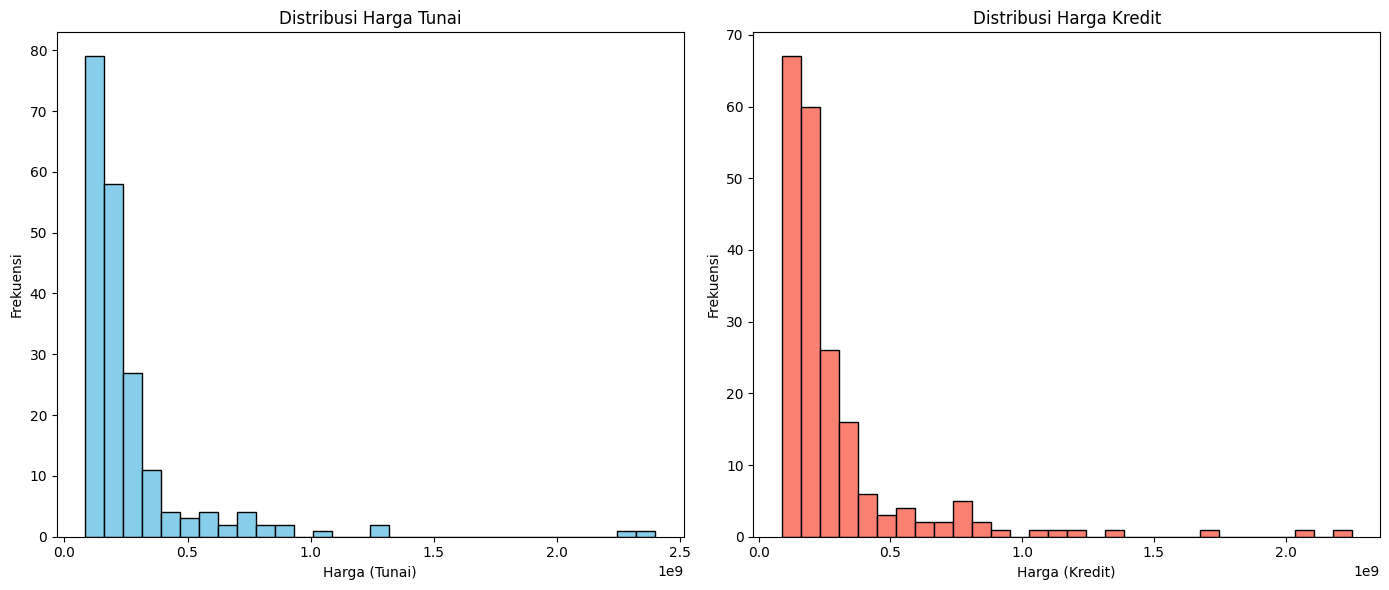

In [10]:
# Distribusi Harga Mobil
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].hist(data_cleaned['price_cash'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribusi Harga Tunai')
axs[0].set_xlabel('Harga (Tunai)')
axs[0].set_ylabel('Frekuensi')
axs[1].hist(data_cleaned['price_credit'], bins=30, color='salmon', edgecolor='black')
axs[1].set_title('Distribusi Harga Kredit')
axs[1].set_xlabel('Harga (Kredit)')
axs[1].set_ylabel('Frekuensi')
plt.tight_layout()
plt.show()

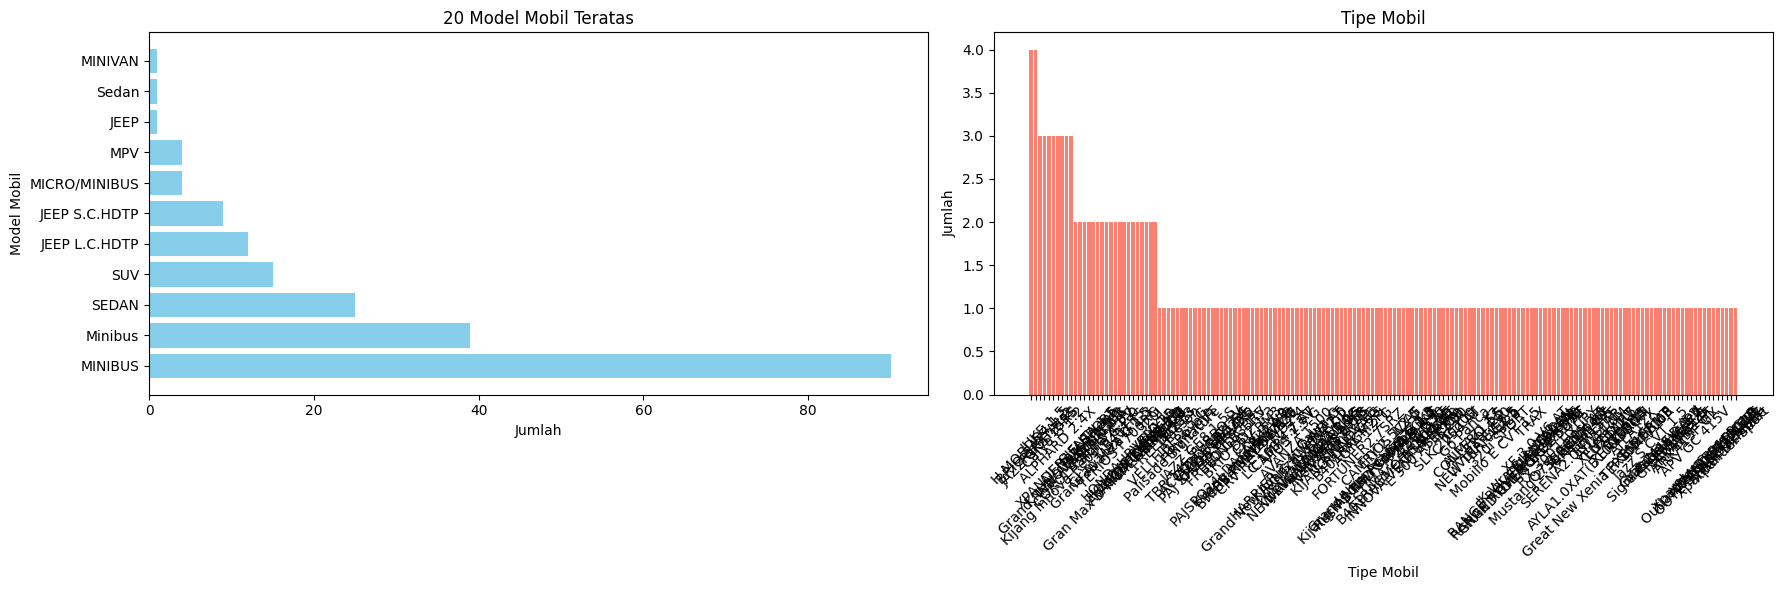

In [11]:
# Jumlah Model dan Tipe Mobil
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
model_counts = data_cleaned['model'].value_counts().head(20)  # 20 model teratas
axs[0].barh(model_counts.index, model_counts.values, color='skyblue')
axs[0].set_title('20 Model Mobil Teratas')
axs[0].set_xlabel('Jumlah')
axs[0].set_ylabel('Model Mobil')
type_counts = data_cleaned['type'].value_counts()
axs[1].bar(type_counts.index, type_counts.values, color='salmon')
axs[1].set_title('Tipe Mobil')
axs[1].set_xlabel('Tipe Mobil')
axs[1].set_ylabel('Jumlah')
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

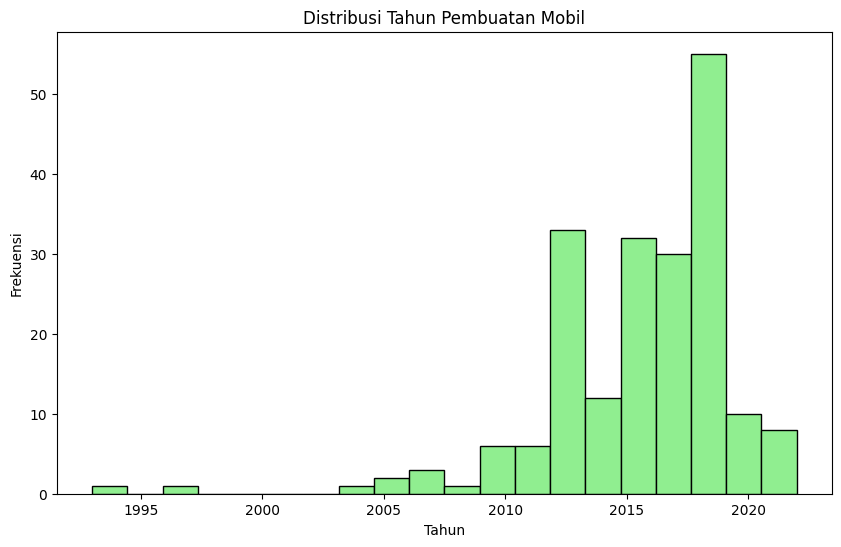

In [12]:
# Distribusi Tahun Pembuatan Mobil
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['year'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribusi Tahun Pembuatan Mobil')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.show()

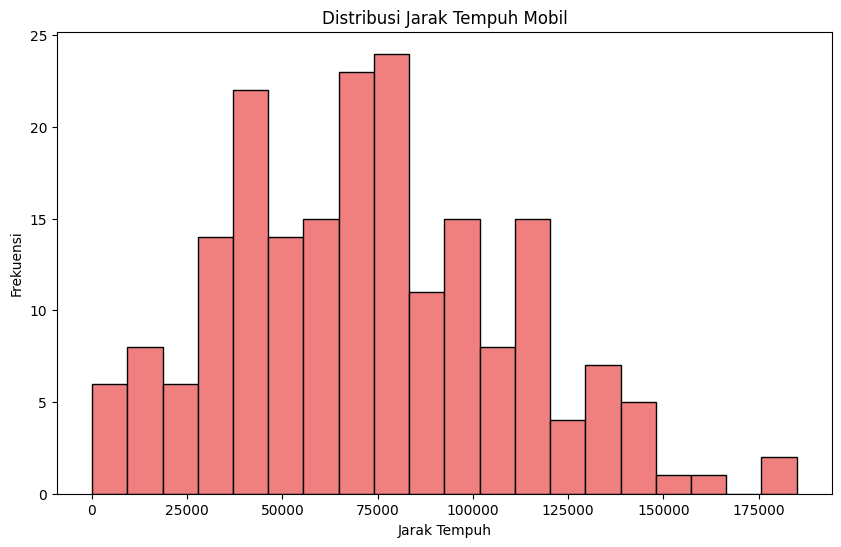

In [13]:
# Distribusi Jarak Tempuh Mobil
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['mileage'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribusi Jarak Tempuh Mobil')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Frekuensi')
plt.show()

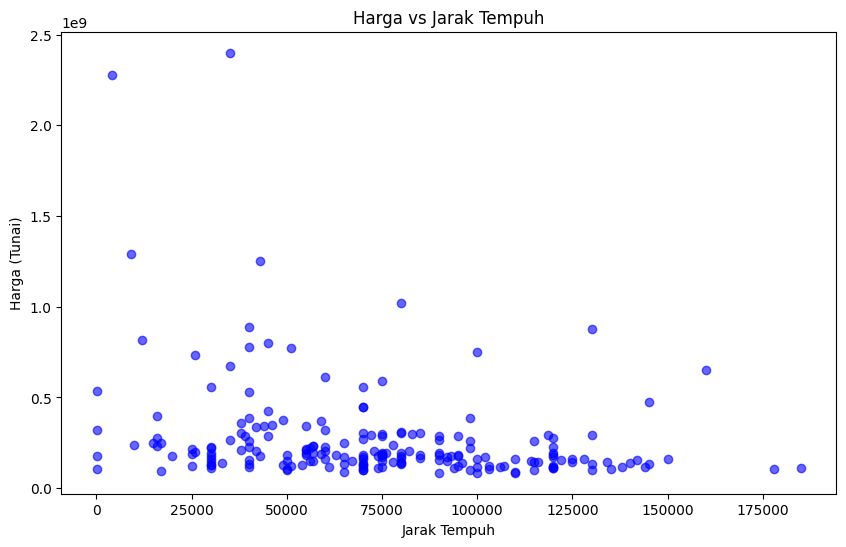

In [14]:
# Scatter plot Harga vs Jarak Tempuh
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['mileage'], data_cleaned['price_cash'], alpha=0.6, color='blue')
plt.title('Harga vs Jarak Tempuh')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Harga (Tunai)')
plt.show()

In [15]:
# Memilih fitur yang relevan dan target
features = ['year', 'mileage', 'cylinder_size', 'price_credit']
target = 'price_cash'
X = data_cleaned[features]
y = data_cleaned[target]

In [16]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Melatih model regresi linear untuk memprediksi harga mobil
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Mengevaluasi model menggunakan Mean Squared Error dan R² Score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.3805712031056828e+16
R^2 Score: 0.8518356836992116


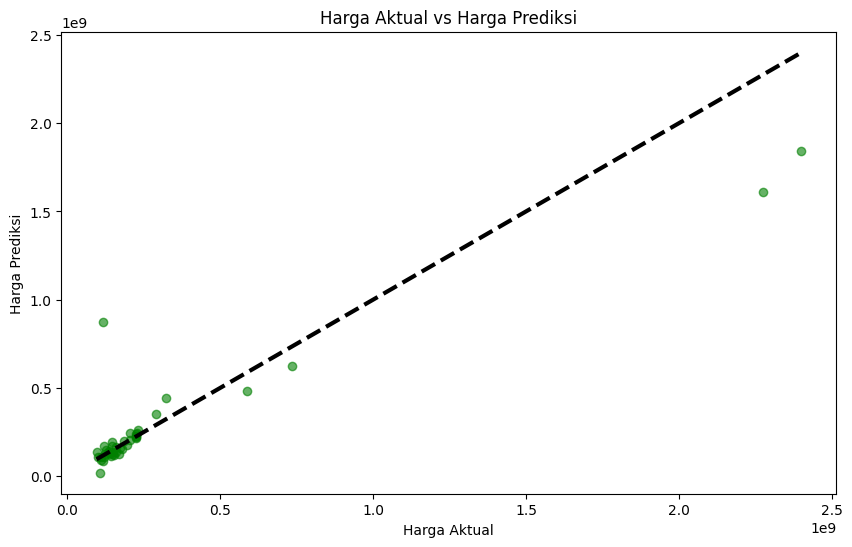

In [19]:
# Scatter plot Harga Aktual vs Harga Prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.title('Harga Aktual vs Harga Prediksi')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

In [26]:
# Simpan model ke file menggunakan pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)